### Setup

- Installation of the required libraries.


In [128]:
! pip install numpy pandas seaborn matplotlib geopandas rasterio

- Importing the libraries


In [129]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio
import rasterio.mask
from rasterio.plot import show

### Data Preparation


In [130]:
nepal = gpd.read_file('./data/Shape_Data/local_unit.shp')
nepal.head()
nepal = nepal.to_crs(epsg=4326)

### Data Visualization

- Loading the raster data

In [ ]:
# List of raster file paths
ppt_2020_path = r'./data/nepal_climate_data/nepal_precipitation_2020.tif'
ppt_2050_path = r'./data/nepal_climate_data/nepal_precipitation_2050.tif'
raster_paths = [ppt_2020_path, ppt_2050_path]

# Loop through the raster files and read data
raster_data = []
for path in raster_paths:
    with rasterio.open(path) as src:
        data = src.read(1)
        bounds = src.bounds
        raster_data.append((data, bounds))

# Display the loaded raster data
for i, (data, bounds) in enumerate(raster_data):
    print(f"Raster {i + 1}:")
    print(f"Data shape: {data.shape}")
    print(f"Bounds: {bounds}")

- Visualizing the Precipitation raster data

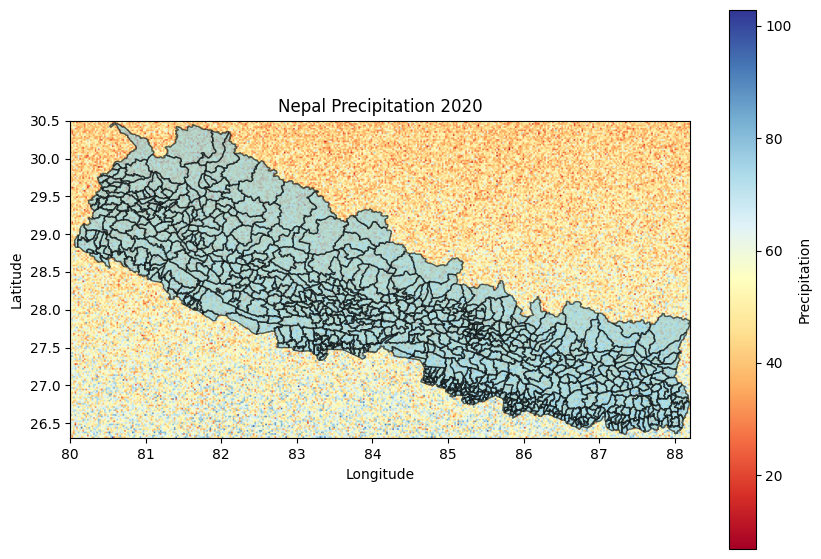

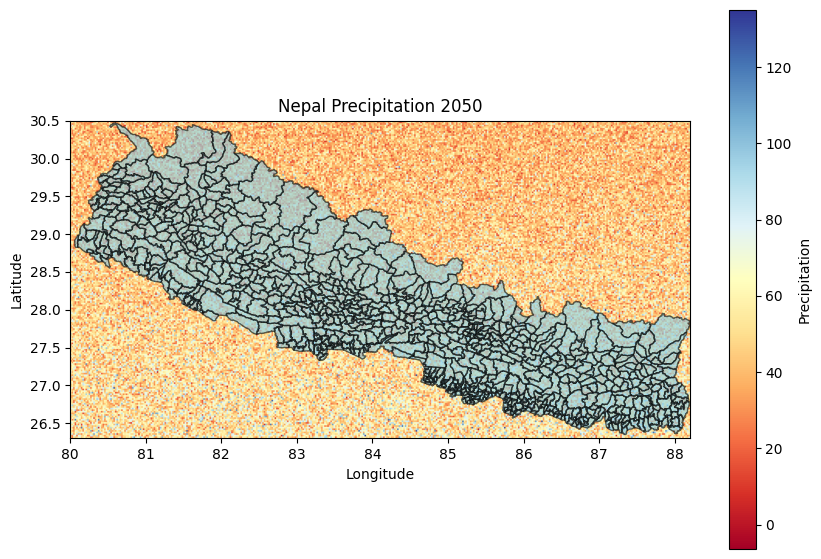

In [131]:
# Define the datasets and titles
datasets = [(ppt_2020, "Nepal Precipitation 2020"), (ppt_2050, "Nepal Precipitation 2050")]

# Loop through the datasets and plot
for data, title in datasets:
    fig, ax = plt.subplots(figsize=(10, 7))

    # Plot the map
    nepal.plot(ax=ax, edgecolor="black", facecolor="skyblue", alpha=0.6)

    # Plot the precipitation data
    im = ax.imshow(data, cmap="RdYlBu", extent=[bounds.left, bounds.right, bounds.bottom, bounds.top])

    colorbar = plt.colorbar(im, ax=ax)
    colorbar.set_label("Precipitation")

    ax.set_title(title)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

    plt.show()

- Comparision of the two raster data

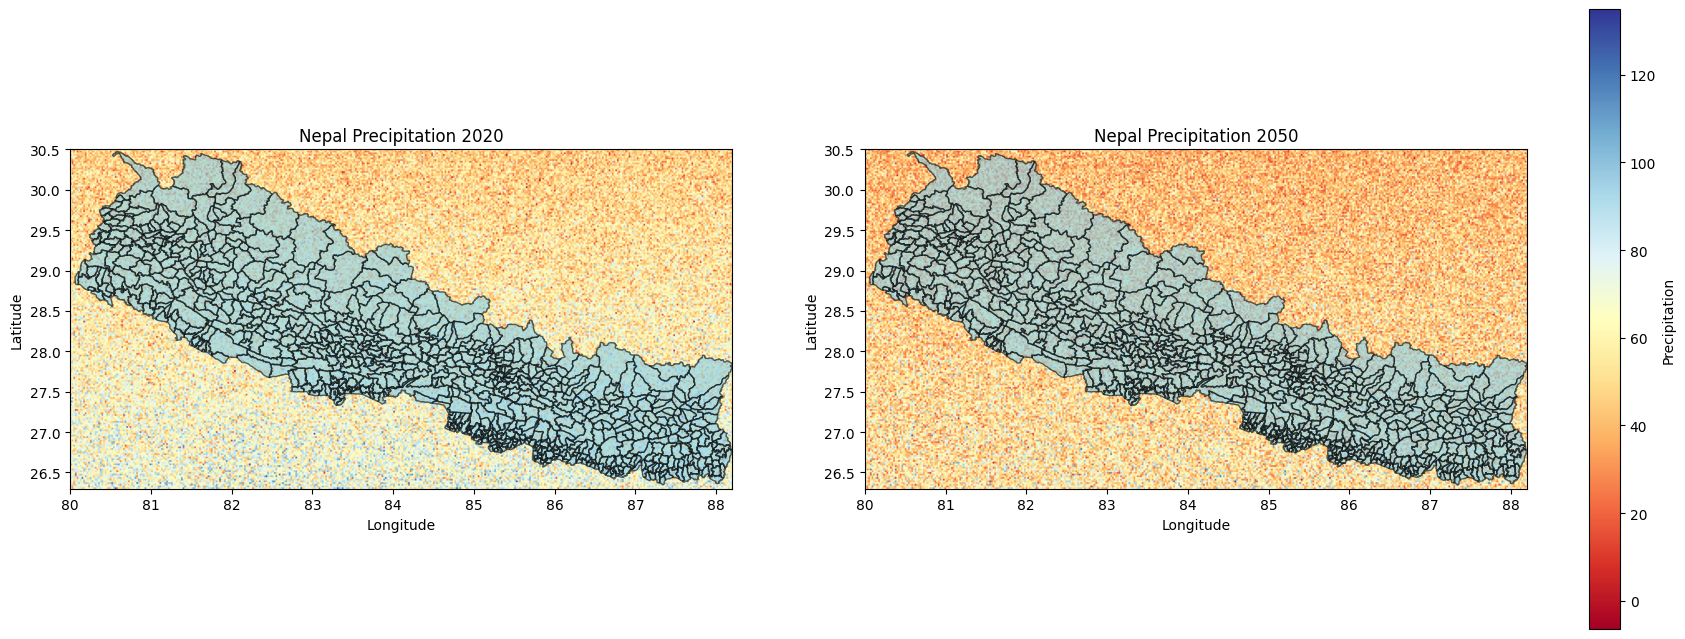

In [132]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Define the datasets and titles
datasets = [(ppt_2020, "Nepal Precipitation 2020"), (ppt_2050, "Nepal Precipitation 2050")]

# Loop through the datasets and plot
for ax, (data, title) in zip(axes, datasets):
    # Plot the map
    nepal.plot(ax=ax, edgecolor="black", facecolor="skyblue", alpha=0.6)

    # Plot the precipitation data
    im = ax.imshow(data, cmap="RdYlBu", extent=[bounds.left, bounds.right, bounds.bottom, bounds.top])

    ax.set_title(title)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

# Add a single colorbar for both subplots
cbar = fig.colorbar(im, ax=axes, orientation="vertical", fraction=0.02, pad=0.04)
cbar.set_label("Precipitation")

plt.show()

### Exploratory Data Analysis performed on the Glaciers data.

- Loading the data

In [133]:
glaciers = gpd.read_file(r'./data/nepal_climate_data/nepal_glaciers.gpkg')
glaciers.head()

,id,retreat_2020,retreat_2050,increase_pct,geometry
0,GL01,11.830574,18.308859,54.758846,POINT (83.07123 29.91778)
1,GL02,10.515828,18.451705,75.466020,POINT (87.79586 29.20924)
2,GL03,13.881700,22.644677,63.126114,POINT (86.00235 29.43822)
3,GL04,14.675666,22.894538,56.003401,POINT (84.909 29.54954)
4,GL05,18.200654,25.343086,39.242723,POINT (81.27935 29.6841)


- Plotting the glaciers on map of Nepal

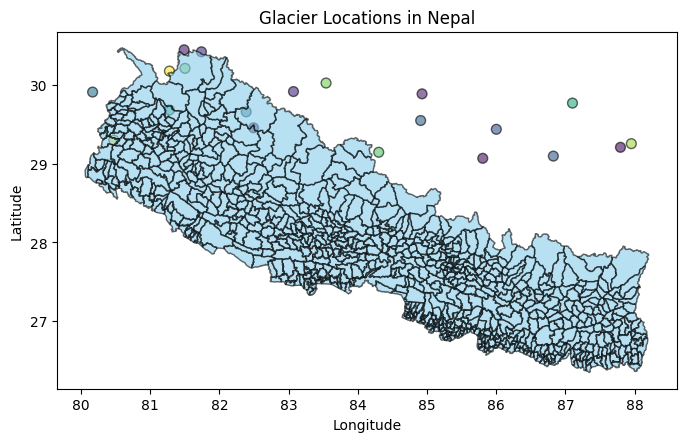

In [134]:

# Create a map plot of glacier locations
fig, ax = plt.subplots(figsize=(8, 6))
glaciers.plot(ax=ax, column='retreat_2020', markersize=50, alpha=0.6, edgecolor="black")
nepal.plot(ax=ax, edgecolor="black", facecolor="skyblue", alpha=0.6)

# Customize map
ax.set_title("Glacier Locations in Nepal")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()


- Performing EDA


Summary Statistics:
       retreat_2020  retreat_2050  increase_pct
count     20.000000     20.000000     20.000000
mean      16.181887     25.311193     56.945175
std        4.907680      8.045469     15.263747
min       10.082832     15.618937     33.702233
25%       11.704777     19.567904     42.659535
50%       15.026326     22.685817     56.569103
75%       20.844409     30.942850     70.275655
max       24.543769     42.099536     79.344347

Missing Values:
id              0
retreat_2020    0
retreat_2050    0
increase_pct    0
geometry        0
dtype: int64


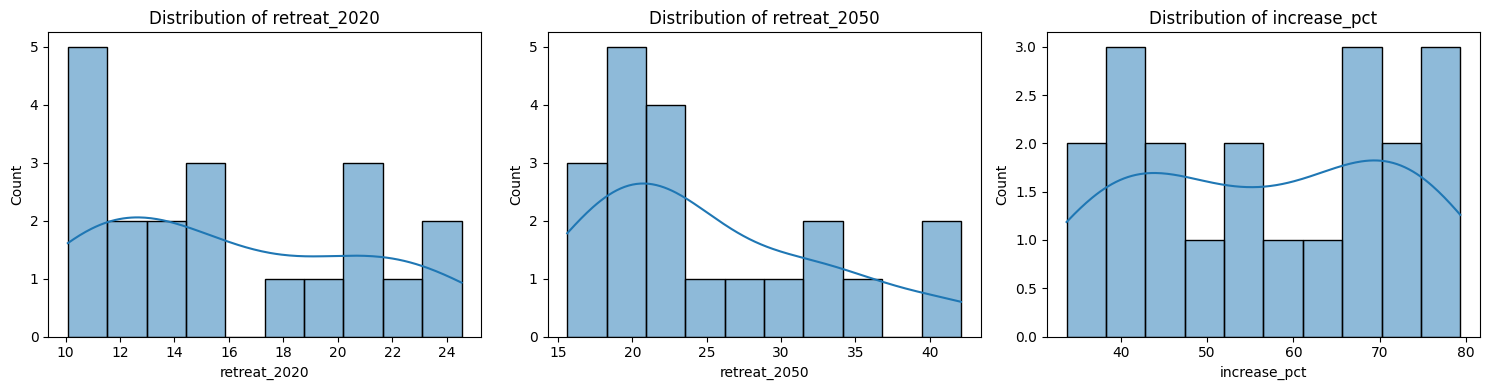

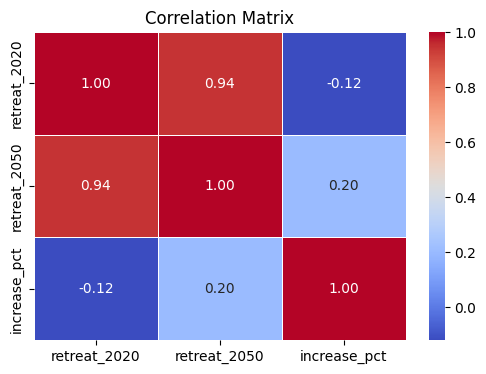

In [135]:

# Summary statistics
summary_stats = glaciers.drop(columns=["id", "geometry"]).describe()
print("\nSummary Statistics:")
print(summary_stats)

# Check for missing values
missing_values = glaciers.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Plot distributions of numerical columns
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
columns = ["retreat_2020", "retreat_2050", "increase_pct"]

for i, col in enumerate(columns):
    sns.histplot(glaciers[col], bins=10, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

# Correlation matrix
corr_matrix = glaciers.drop(columns=["id", "geometry"]).corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()



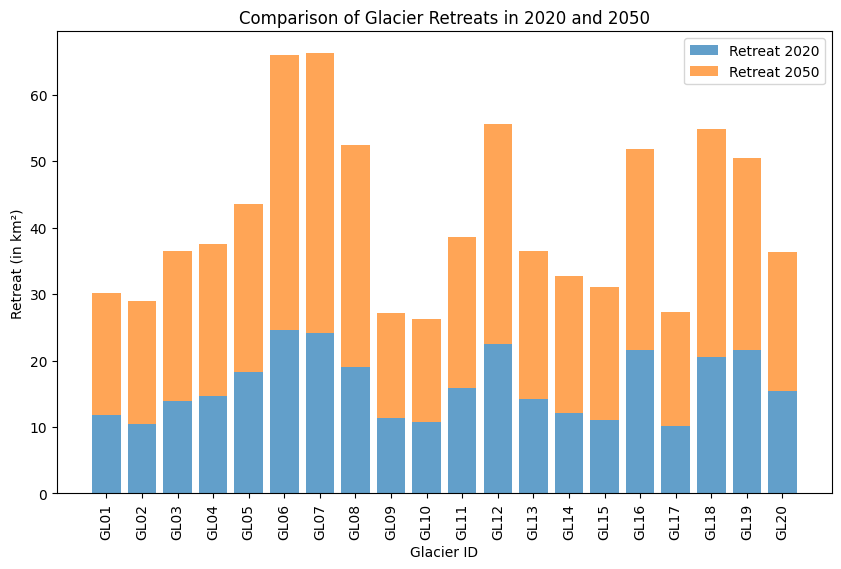

In [136]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the glacier retreats for 2020 and 2050
ax.bar(glaciers['id'], glaciers['retreat_2020'], label='Retreat 2020', alpha=0.7)
ax.bar(glaciers['id'], glaciers['retreat_2050'], label='Retreat 2050', alpha=0.7, bottom=glaciers['retreat_2020'])

# Add labels and title
ax.set_xlabel('Glacier ID')
ax.set_ylabel('Retreat (in km²)')
ax.set_title('Comparison of Glacier Retreats in 2020 and 2050')
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()

Here are the observations from the bar plot of glacier retreat:

1. **Comparison of Retreats**: The bar plot compares glacier retreats in 2020 and 2050 for each glacier. It highlights the increase in retreat over time.

2. **Significant Increase**: Most glaciers show a significant increase in retreat from 2020 to 2050, indicating accelerated glacier melting.

3. **Variability**: The extent of retreat varies across glaciers, with some glaciers experiencing a much larger increase in retreat compared to others.

4. **Stacked Representation**: The stacked bar representation effectively visualizes the cumulative retreat, making it easier to compare the total retreat for each glacier.

5. **Trend**: The overall trend suggests that glacier retreat is expected to intensify by 2050, likely due to climate change impacts.